<a href="https://colab.research.google.com/github/Kaidus23/Skills-Assessment-2/blob/main/Geographycal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(1) Importing Drive**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**(2) Importing library files**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


**(3) Heatmap visualization of Authors**

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


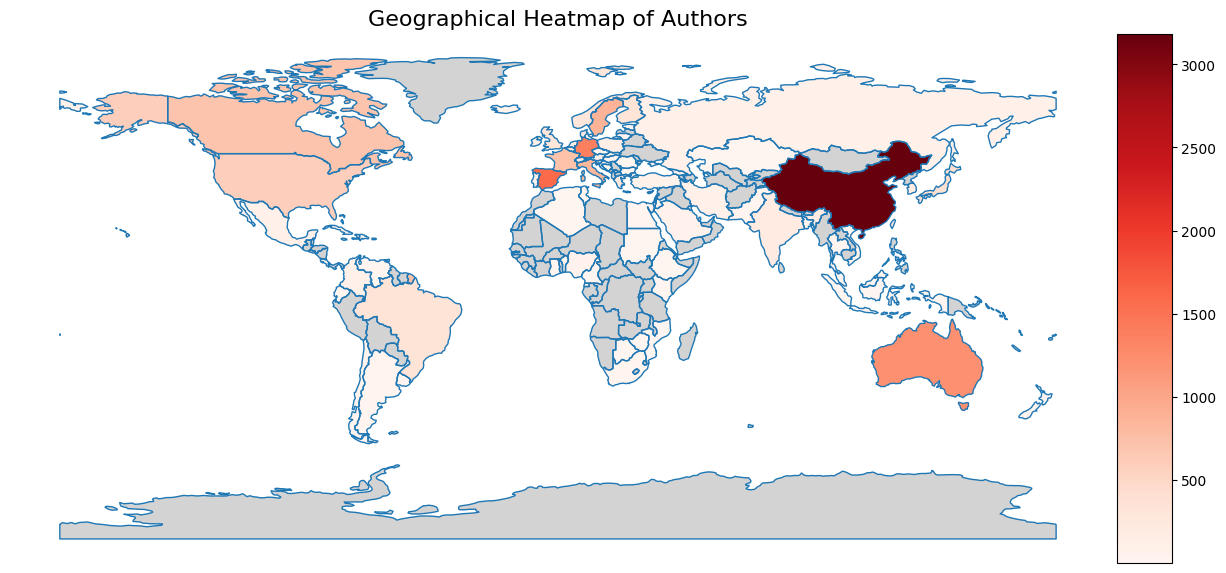

In [34]:
# Load the data (replace with your actual file paths)
authors_path = '/content/drive/MyDrive/Colab Notebooks/Assesment/Skills for Data Scientist/Group 4/authors.APOE.csv'
authors_df = pd.read_csv(authors_path)

# Extract country names from AuthorAffiliation using regex
def extract_country(affiliation):
    import re
    match = re.search(r',\s*([A-Za-z\s]+)\.?$', affiliation)
    return match.group(1).strip() if match else None

authors_df['Country'] = authors_df['AuthorAffiliation'].dropna().apply(extract_country)

# Count occurrences of each country
country_counts = authors_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# --- Heatmap Visualization ---
# Load a world shapefile for geographical plotting
# Downloading the "naturalearth_lowres" shapefile manually from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
# and providing the path to the .shp file here
shapefile_path = '/content/drive/MyDrive/Colab Notebooks/Assesment/Skills for Data Scientist/Group 4/ne_110m_admin_0_countries.zip (Unzipped Files)/ne_110m_admin_0_countries.shp'  # Replace with your actual path
world = gpd.read_file(shapefile_path)
# Ensure we use the correct column from the world GeoDataFrame for merging
print(world.columns)  # Check available columns in the GeoDataFrame

# Merge the country data with the world GeoDataFrame
world = world.merge(country_counts, left_on='ADMIN', right_on='Country', how='left')

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Count', ax=ax, legend=True, cax=cax,
           cmap='Reds', missing_kwds={"color": "lightgrey"})

ax.set_title('Geographical Heatmap of Authors', fontsize=16)
ax.set_axis_off()
plt.show()
